<a href="https://colab.research.google.com/github/suryajaa/Healthcare-Insurance-Cost-Prediction/blob/main/Medical_Insurance_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [103]:
import kagglehub

# Download the dataset from Kaggle
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [104]:
# Loading the dataset into a pandas DataFrame
data_path = path + "/insurance.csv"
data = pd.read_csv(data_path)

In [105]:
# Displaying the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [107]:
# Statistical summary of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Exploratory Data Analysis (EDA)

<Figure size 600x600 with 0 Axes>

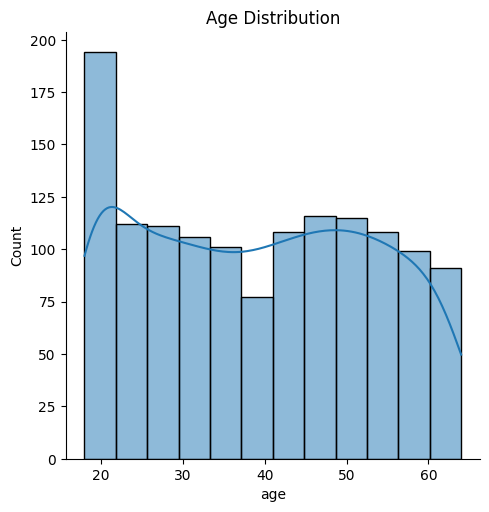

In [98]:
# Plot distribution of the 'age' feature

plt.figure(figsize=(6,6))
sns.displot(data['age'],kde=True)
plt.title('Age Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

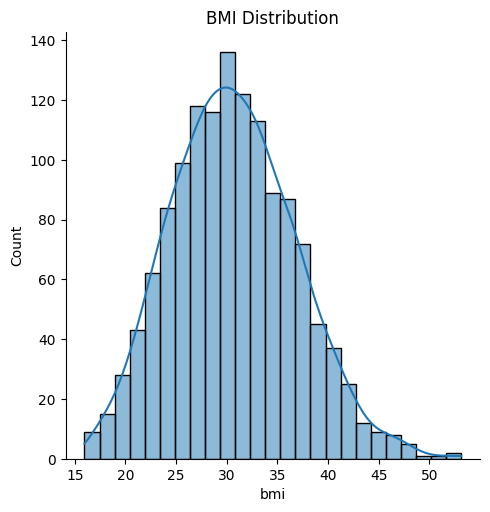

In [8]:
# Plot distribution of the 'bmi' feature
plt.figure(figsize=(6,6))
sns.displot(data['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

<ipython-input-9-a6695544f1f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="region",palette='tab10')


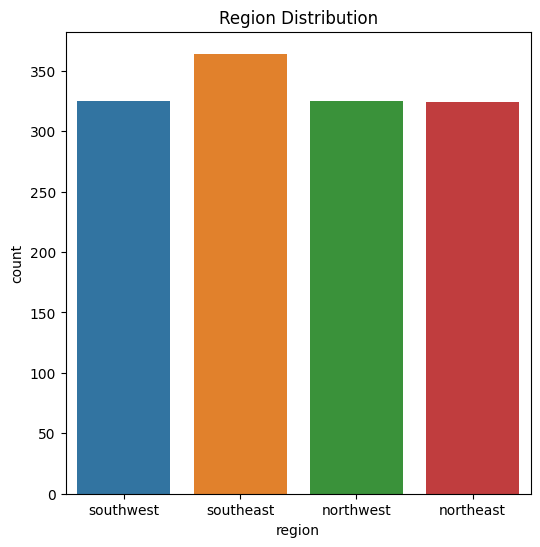

In [9]:
# Countplot for the 'region' feature

from typing import Any
plt.figure(figsize=(6,6))
sns.countplot(data, x="region",palette='tab10')
plt.title('Region Distribution')
plt.show()

<ipython-input-10-f54a672e6cc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x="smoker",palette='tab10')


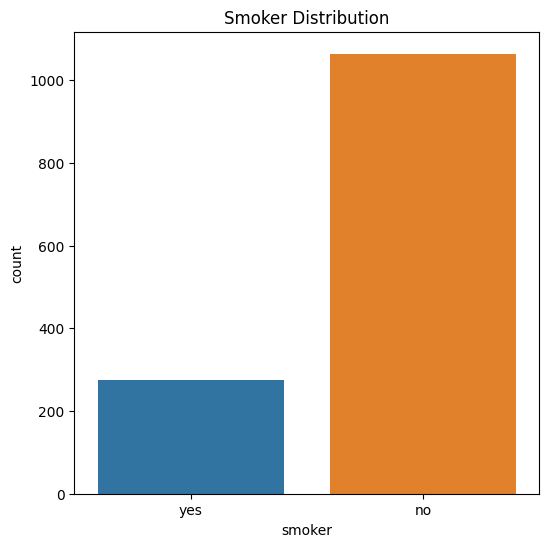

In [10]:
# Countplot for the 'smoker' feature

plt.figure(figsize=(6,6))
sns.countplot(data, x="smoker",palette='tab10')
plt.title('Smoker Distribution')
plt.show()

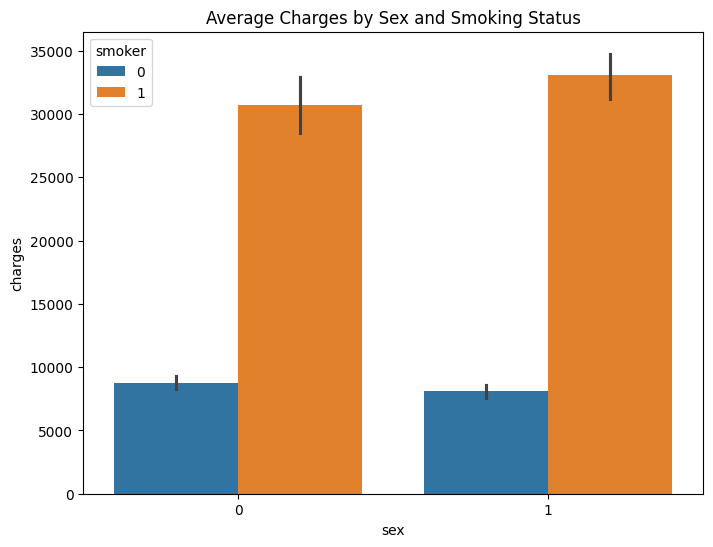

In [99]:
# Average charges by smoker and sex
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='sex', y='charges', hue='smoker', palette='tab10')
plt.title('Average Charges by Sex and Smoking Status')
plt.show()


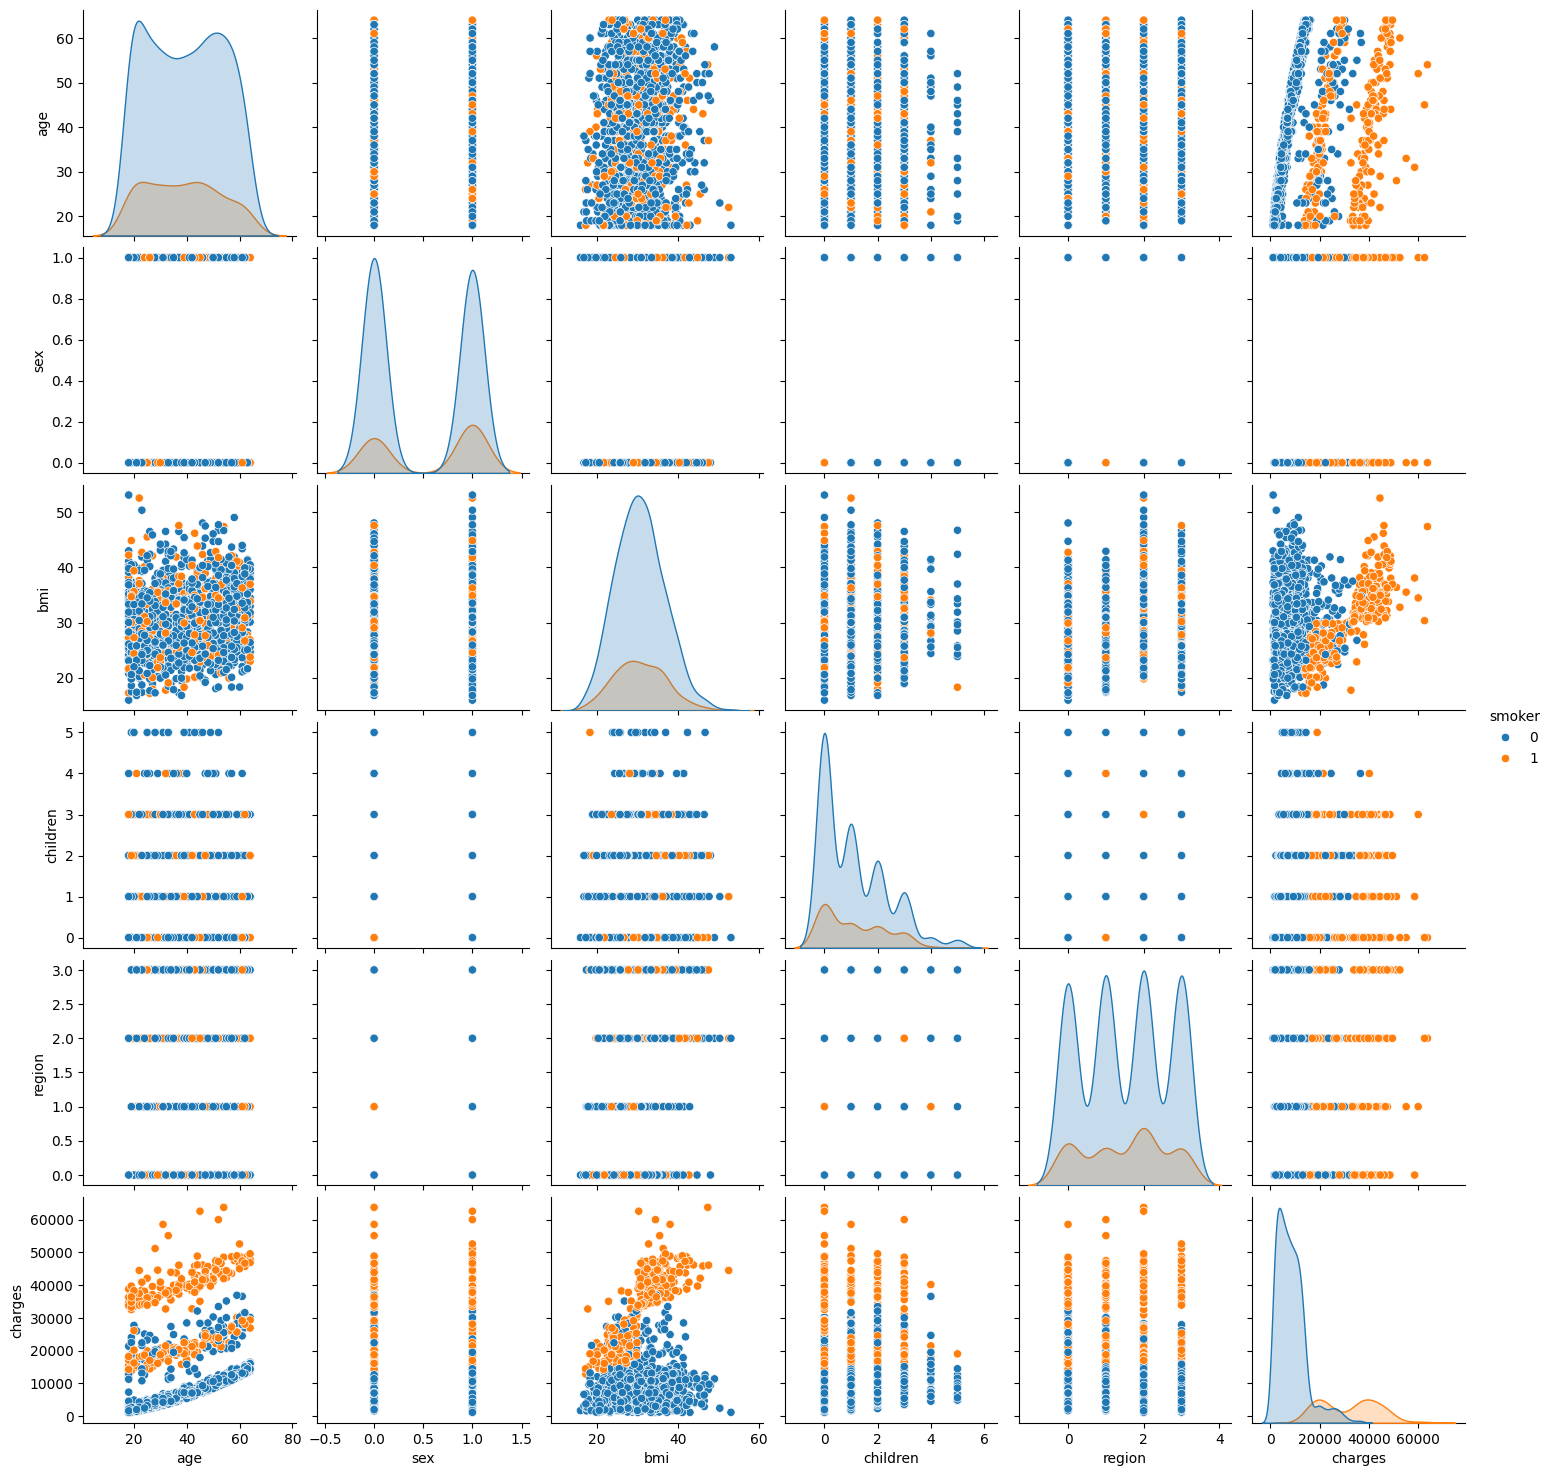

In [89]:
# Pairplot to explore relationships between features
sns.pairplot(data, hue='smoker', diag_kind='kde')
plt.show()

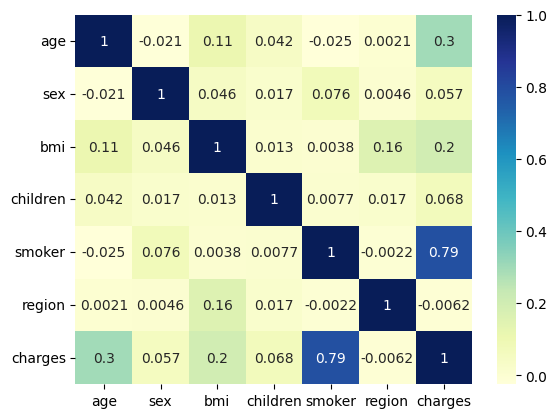

In [13]:
# Correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Preprocessing the Data

In [108]:
data['sex'].value_counts()

,count
sex,
male,676
female,662


In [109]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [110]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [12]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
data['sex'].value_counts()

,count
sex,
1,676
0,662


In [16]:
data['region'].value_counts()

,count
region,
2,364
3,325
1,325
0,324


In [17]:
data['smoker'].value_counts()

,count
smoker,
0,1064
1,274


In [100]:
# Split the data into features (X) and target variable (y)
X=data.drop(['charges'],axis=1)
y=data['charges']

# Feature engineering: Add interaction terms
X['smoker_age'] = X['smoker'] * X['age']
X['smoker_bmi'] = X['smoker'] * X['bmi']

In [19]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
# Model 1: Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
train_pred=lr.predict(X_train)

In [22]:
r2_score(y_train,train_pred)

0.8385762267496387

In [23]:
y_pred=lr.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.8480422925607837

In [25]:
# Evaluation for Linear Regression
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

2835.9487776571304

In [26]:
mape=metrics.mean_absolute_percentage_error(y_test,y_pred)
mape

0.2876788199669399

In [75]:
# Model 2: KNeighbors Regressor
model3 = KNeighborsRegressor()

In [76]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=2),
                       param_grid=param_grid,
                       cv=5,
                       scoring='neg_mean_absolute_error',
                       verbose=2)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_dep

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [77]:
# Getting the best Random Forest model
best_rf = rf_grid.best_estimator_
print(f"Best Parameters: {rf_grid.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [78]:
# Evaluating performance of the tuned Random Forest alone
y_pred_rf = best_rf.predict(X_test)
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf)}")
print(f"Random Forest MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred_rf) * 100:.2f}%")

Random Forest R² Score: 0.8596150352256478
Random Forest MAPE: 32.22%


In [94]:
# Combining the models using majority voting
ensemble = VotingRegressor(estimators=[('knn', model3), ('lr', lr), ('rf', best_rf)])

In [95]:
# Fitting the ensemble on the training data
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('knn', KNeighborsRegressor()),
                            ('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   random_state=2))])

In [102]:
# Evaluating the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(X_test, y_test)*100} %")
y_pred_ensemble = ensemble.predict(X_test)
print(f"Voting Regressor R² Score: {r2_score(y_test, y_pred_ensemble)}")
print(f"Voting Regressor MAPE: {metrics.mean_absolute_percentage_error(y_test, y_pred_ensemble) * 100:.2f}%")


Accuracy of the ensemble: 86.20987209491484 %
Voting Regressor R² Score: 0.8620987209491484
Voting Regressor MAPE: 29.35%
